<a href="https://colab.research.google.com/github/tgp989/Integracion-de-datos-y-prospectiva/blob/main/1_Caracterizaci%C3%B3n_VA_Clase.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

##**Gestión de riesgos operacionales - EVERGREEN**
En este espacio de trabajo se plantea como caso de estudio el análisis de los riesgos asociados a las operaciones del negocio de la Naviera EVERGREEN.

Esta naviera taiwanesa opera en 240 puertos alrededor del mundo utilizando 150 buques Canal de Panamá.

Los riesgos operacionales a los cuales está expuesta la naviera están relacionados a la logistica portuaria frente a la carga y descarga de contenedores. De esta manera, este riesgo operacional se describe a través de dos variables aleatorias:
* Frecuencia: Indica el número de contenedores que se quedan en tierra por semana (tiempo).
* Severidad (KUSD): Indica el costo de solucionar cada evento de riesgo.

Es importante mencionar que el producto entre la frecuencia y la severidad da como resultado la distribución agregada de las pérdidas (LDA - Loss Distribution Approach) y es precisamente qye se hará la caracterización de esta distribución utilizando las medidas de tendencia central (media, desviación) y las medidas de dispersión (coeficiente de asimetría, Kurtosis).

0. Cargar las librerias de trabajo

In [3]:
import numpy as np
import pandas as pd
import seaborn as sns # Esta es una librería para el trabajo estadístico
import matplotlib.pyplot as plt

from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


1. Se cargan los archivos de trabajo

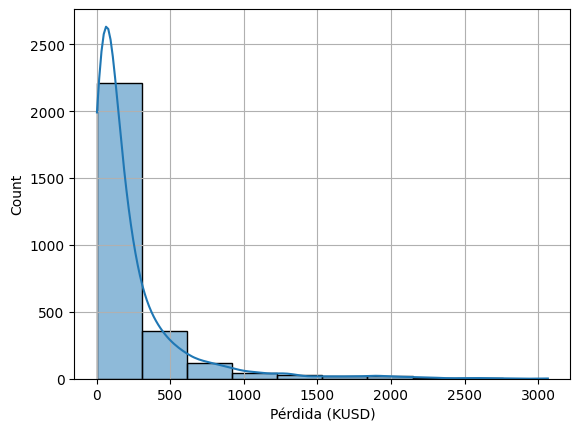

In [5]:
nxl="/content/drive/MyDrive/integración de datos y prospectiva/1/1 RiesgoOperacional_EVERGREEEN.xlsx"
XDB=pd.read_excel(nxl,sheet_name=0)
XDB.head(10)

# Procedemos con la construcción de la distribución agregada de las pérdidas
Freq=XDB.iloc[:,3]
Sev=XDB.iloc[:,4]
LDA=Freq*Sev

# Se procede con la construcción de la distribución agregada
plt.figure()
sns.histplot(LDA,bins=10,kde=True)
plt.xlabel("Pérdida (KUSD)")
plt.grid()
plt.show()